# Simple NN, initialization, query & train

In [0]:
import numpy
#scipy.special for sigmoid function expit()
import scipy.special

import matplotlib.pyplot
%matplotlib inline


Writing a function to create a neural network using sigmoid activation function

In [0]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # learning rate
        self.lr = learningrate
        
                
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
             
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [0]:
# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [0]:
# link weight matrices, wih and who
# weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
# w11 w21
# w12 w22 etc 

#wih = (numpy.random.rand(n.hnodes, n.inodes)-0.5)
#who = (numpy.random.rand(n.onodes, n.hnodes)-0.5)


In [0]:
print(n.wih)

[[-0.6089006   0.47836402 -1.07105264]
 [-0.23738511  0.07391861 -1.05500814]
 [ 0.3097048   0.20003387  0.94501092]]


In [0]:
print(n.who)

[[-0.47498515  0.02971418  0.47568873]
 [ 0.91687815 -0.54792445 -0.74404692]
 [ 0.52497249 -0.75453811 -0.68996366]]


In [0]:
# test query (doesn't mean anything useful yet)
n.query([.5, 0.4, -1.2])

array([[0.44957867],
       [0.51650513],
       [0.4072176 ]])

In [0]:
# open the CSV file and read its contents into a list
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [0]:
# check the number of data records (examples)
len(data_list)

100

In [0]:
# show a dataset record
# the first number is the label, the rest are pixel colour values (greyscale 0-255)
data_list[1]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196

In [0]:
# take the data from a record, rearrange it into a 28*28 array and plot it as an image
all_values = data_list[1].split(',')
print(all_values)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '51', '159', '253', '159', '50', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '48', '238', '252', '252', '252', '237', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '54', '227', '253', '252', '239', '233', '252', '57', '6', '0', '0', '

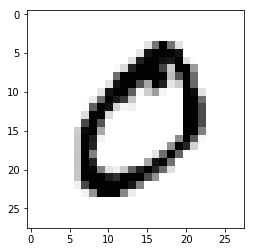

In [0]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [0]:
# scale input to range 0.01 to 1.00
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [0]:
#output nodes is 10 (example)
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [0]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
n.train(scaled_input, targets)        

In [0]:
n.query(scaled_input)



array([[0.6928778 ],
       [0.3045112 ],
       [0.28209686],
       [0.29500609],
       [0.36028186],
       [0.24680356],
       [0.28415861],
       [0.38931141],
       [0.33414944],
       [0.27224128]])